# ***LINEAR DISCRIMINANT ANALYSIS (LDA)***

## IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


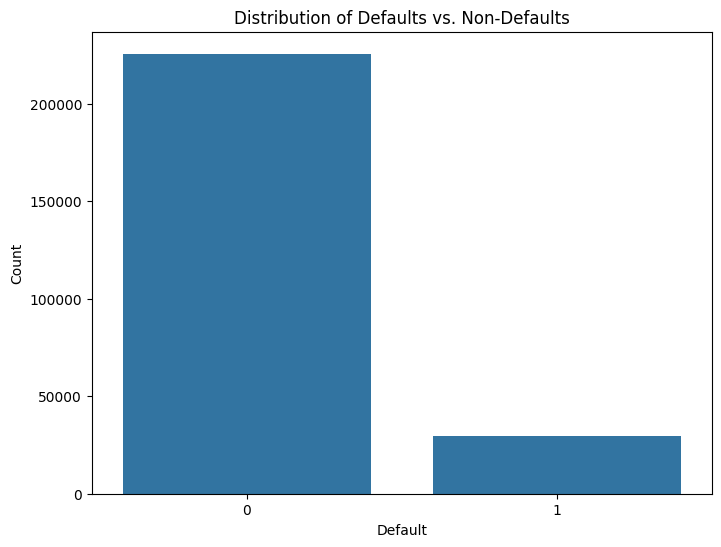

In [3]:
# Distribution of Defaults vs. Non-Defaults
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df)
plt.title('Distribution of Defaults vs. Non-Defaults')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

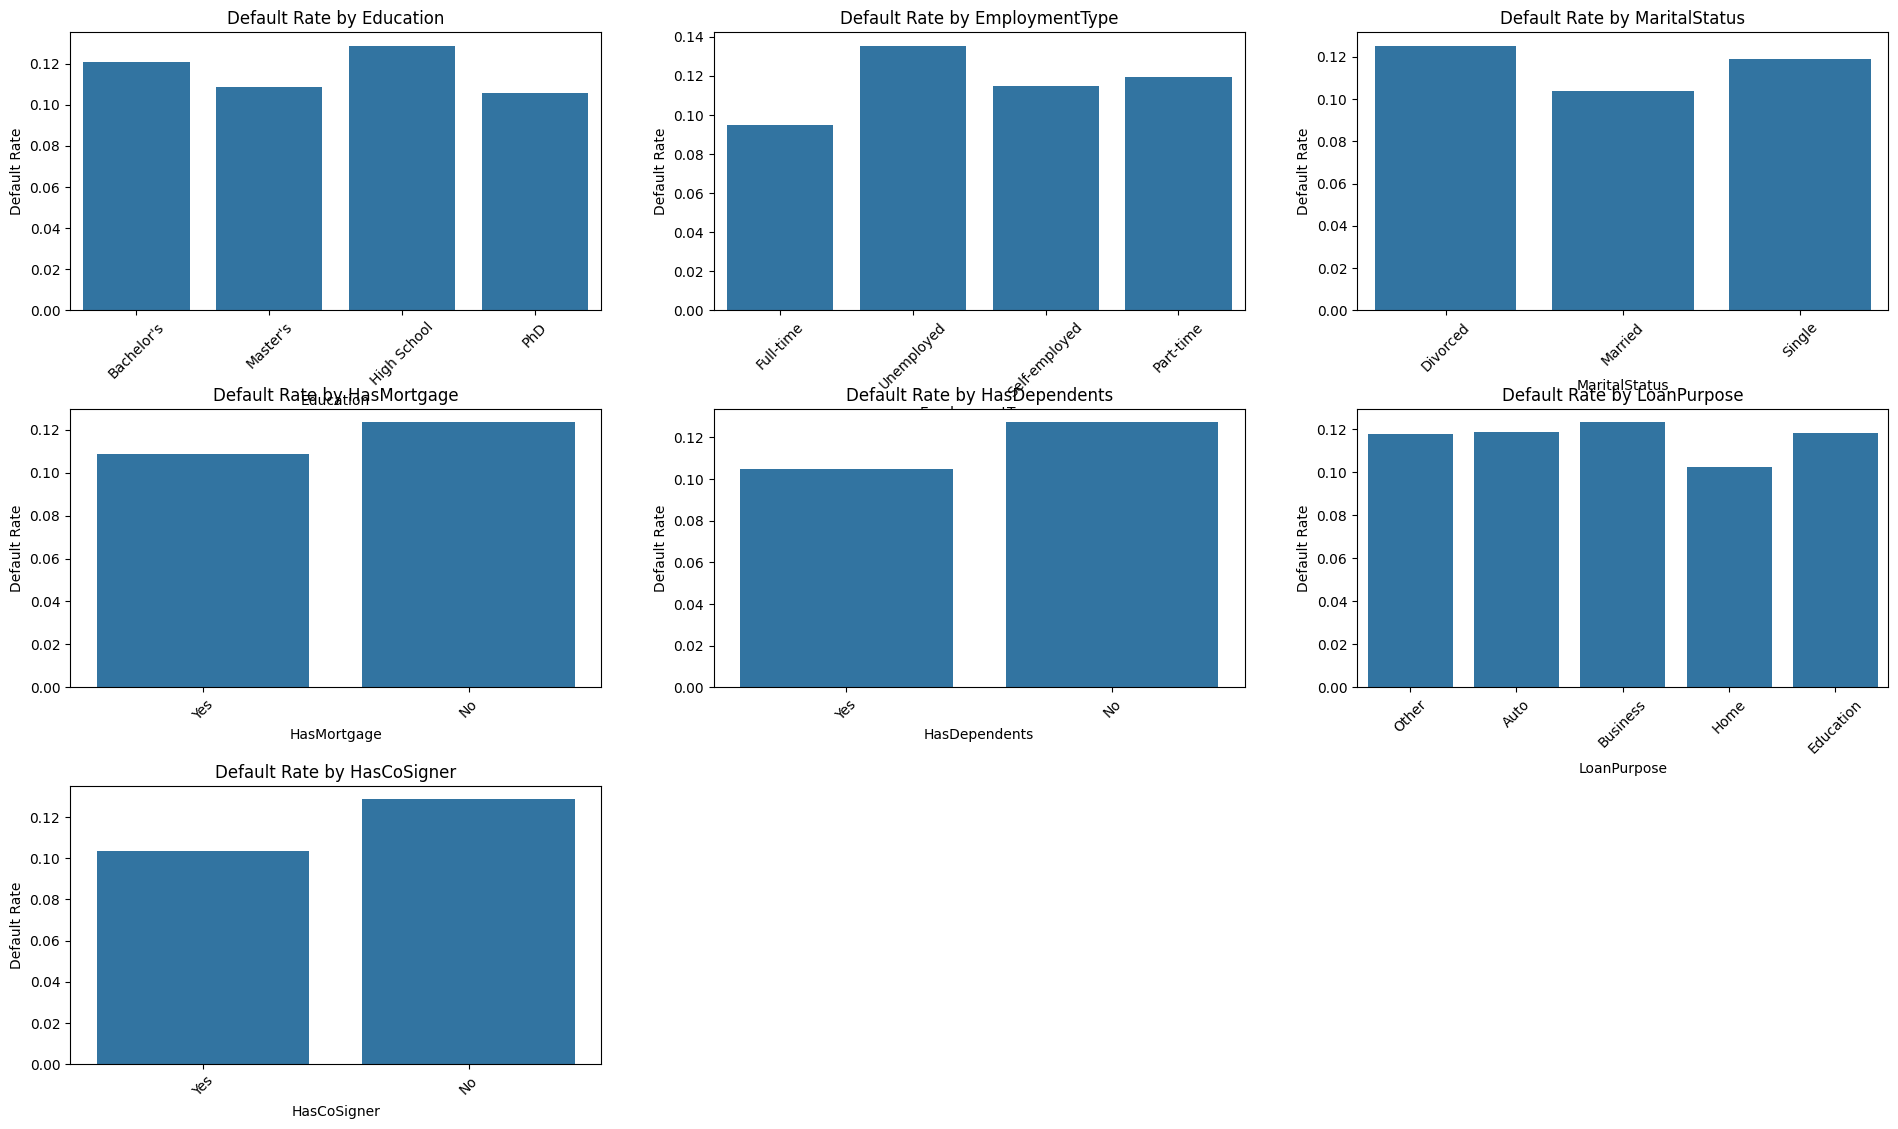

In [4]:
# Default Rate by Categorical Variables in a collage
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
num_cols = 3  # Number of columns for the subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_columns):
    row = i // num_cols
    col_idx = i % num_cols
    sns.barplot(x=col, y='Default', data=df, errorbar=None, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Default Rate by {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Default Rate')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

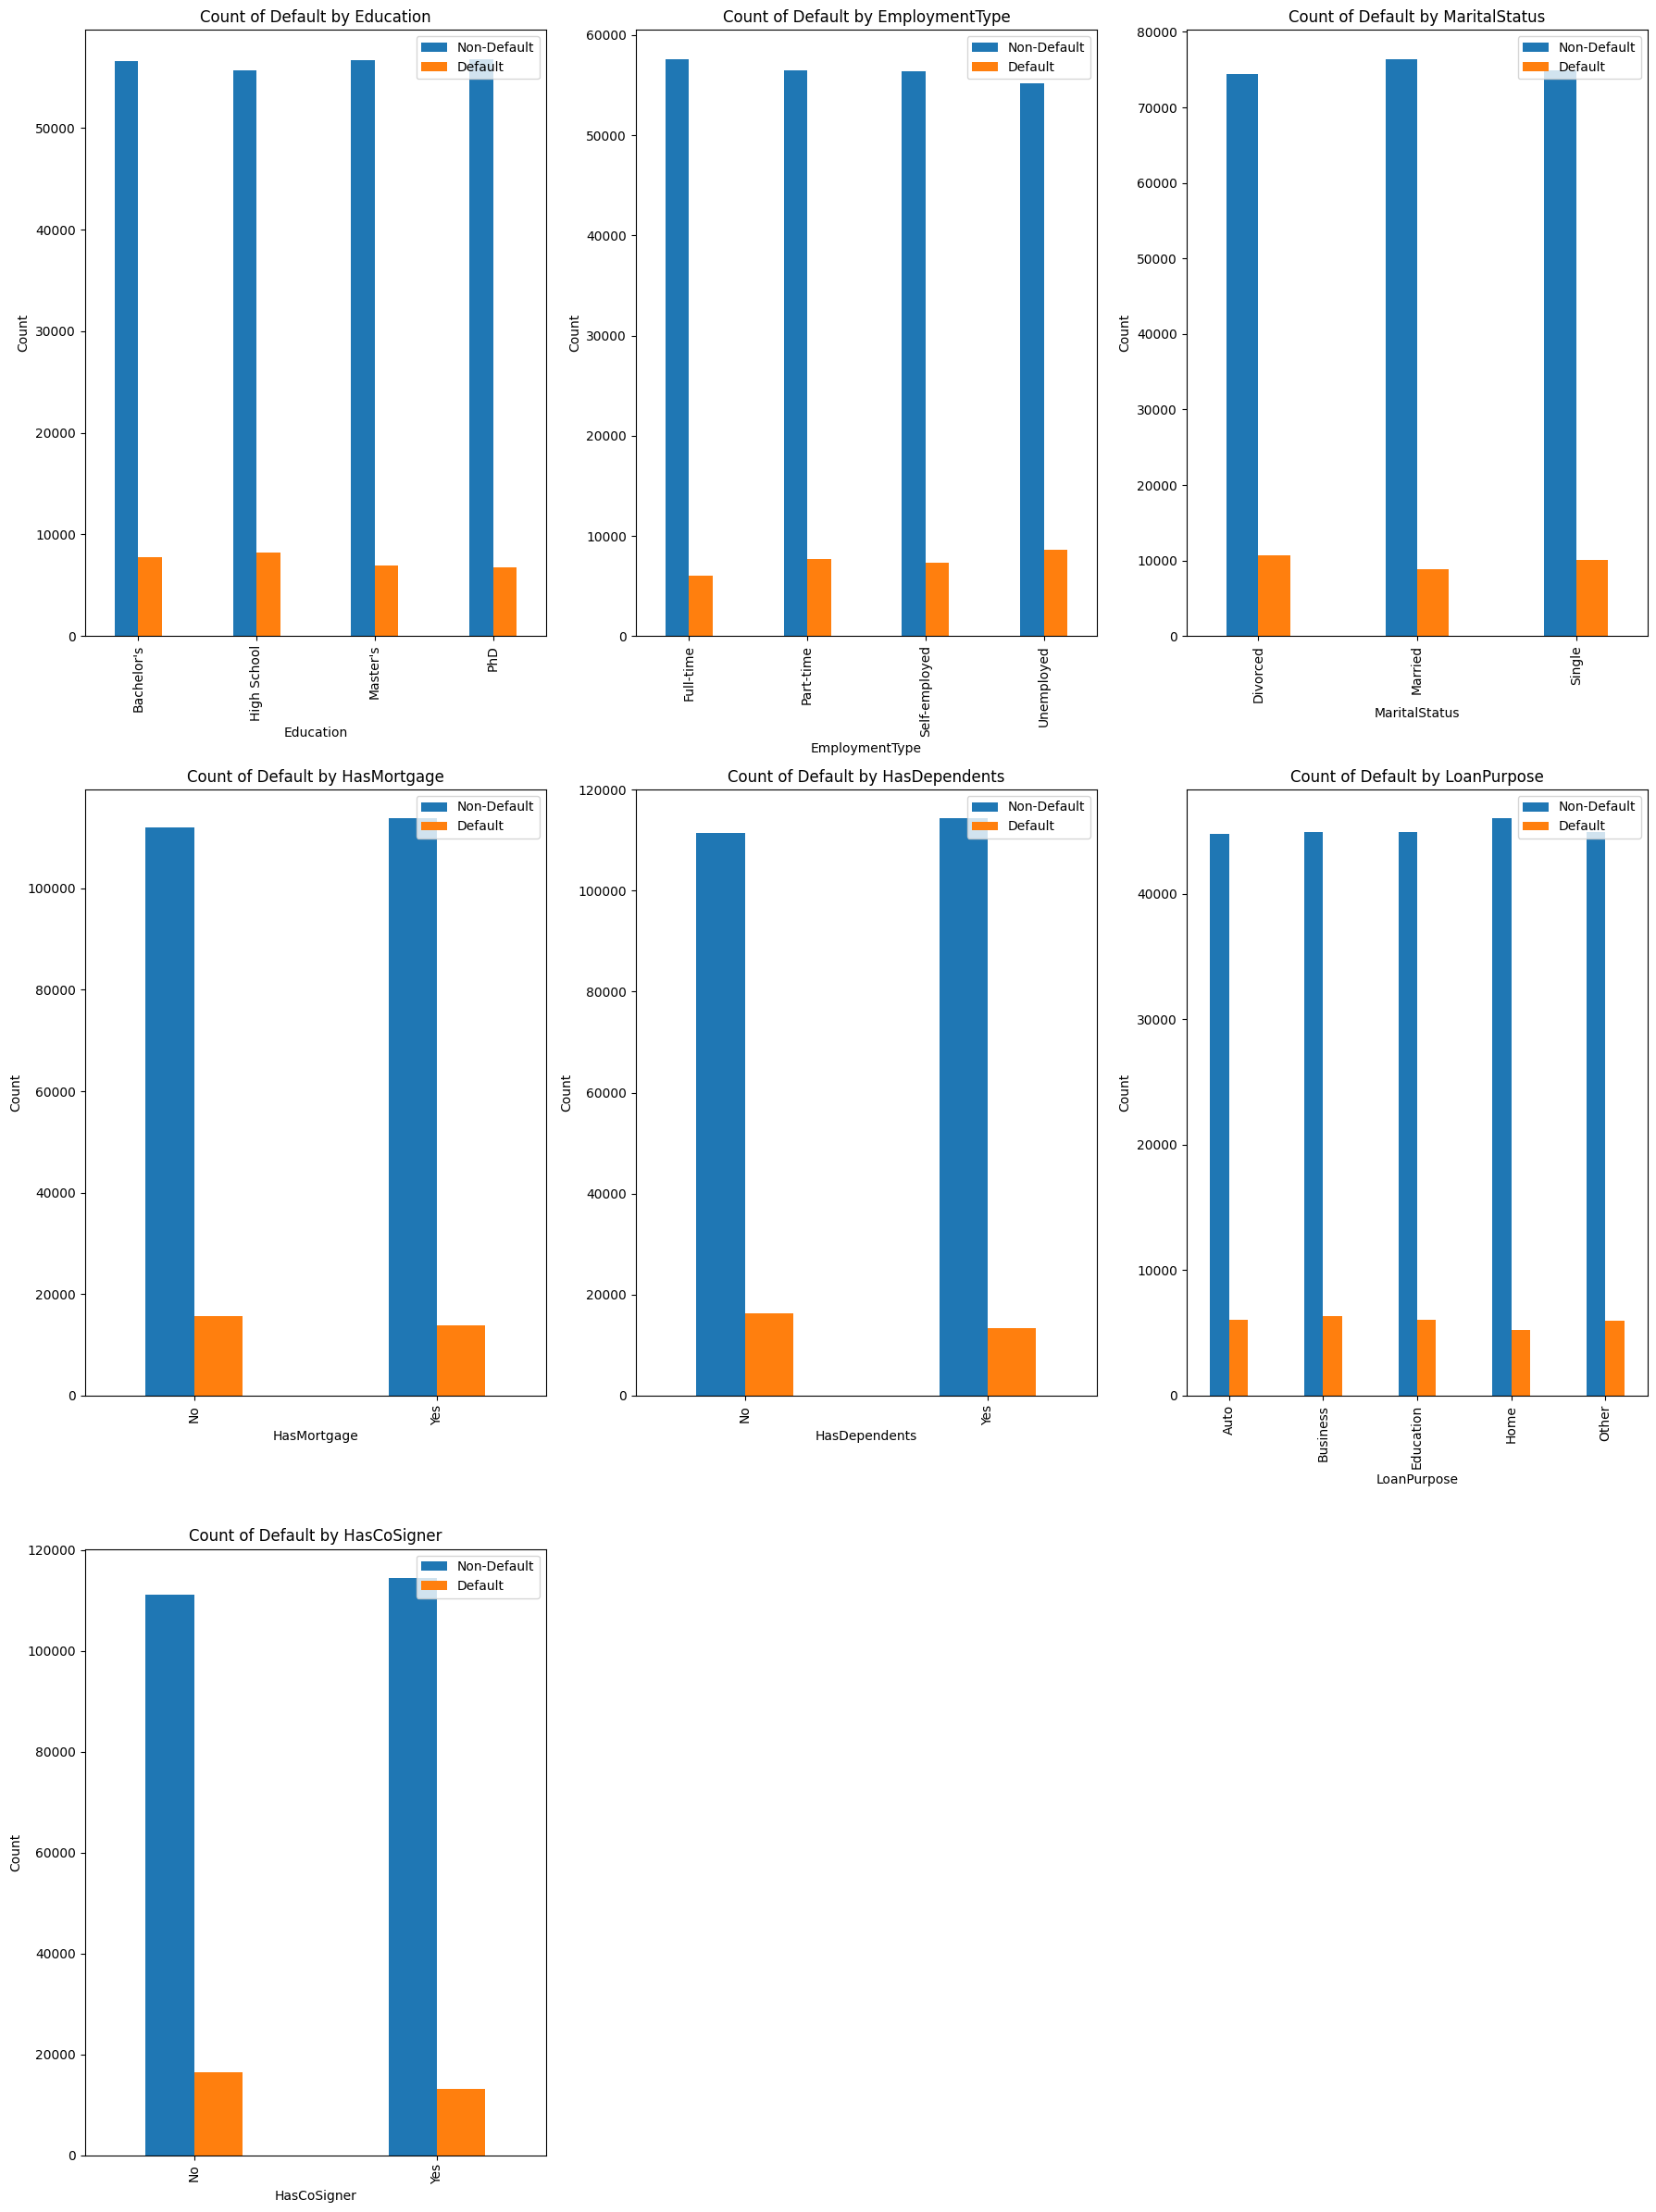

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Determine subplot layout
num_cols = 3  # Number of columns for the subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Number of rows needed

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8 * num_rows))
fig.tight_layout(pad=5.0)

# Iterate through each categorical column and create bar plots
for i, col in enumerate(categorical_columns):
    row = i // num_cols
    col_idx = i % num_cols
    
    # Calculate counts of defaults and non-defaults for each category
    count_data = df.groupby([col, 'Default']).size().unstack()
    
    # Plot bar chart
    count_data.plot(kind='bar', ax=axes[row, col_idx], width=0.4)
    axes[row, col_idx].set_title(f'Count of Default by {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].legend(['Non-Default', 'Default'], loc='upper right')

# Remove empty subplots if there are any
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## REMOVING USELESS COLUMNS

In [6]:
df = df.drop(columns=['LoanID'])

In [7]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## ENCODING SOME OF THE COLUMNS

## LABEL ENCODING

In [7]:
from sklearn.preprocessing import LabelEncoder

# Define columns to be label encoded
cols_to_label_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and apply label encoding
for col in cols_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [9]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


## ONE-HOT ENCODING 

In [8]:
#Define columns to one-hot encode
cols_to_one_hot_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Applying one-hot encoding using pandas
df = pd.get_dummies(df, columns=cols_to_one_hot_encode, drop_first=True)

In [11]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_3,MaritalStatus_1,MaritalStatus_2,HasMortgage_1,HasDependents_1,LoanPurpose_1,LoanPurpose_2,LoanPurpose_3,LoanPurpose_4,HasCoSigner_1
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False


## SPLITTING THE DATASET

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Assuming df is your DataFrame after encoding
X = df.drop(columns=['Default'])  # Features
y = df['Default']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (178742, 24), y_train shape: (178742,)
X_test shape: (76605, 24), y_test shape: (76605,)


## FEATURE SCALING

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Print the first few rows of scaled data to verify
print("Scaled X_train:")
print(X_train_scaled[:5, :]) 
print("\nScaled X_test:")
print(X_test_scaled[:5, :])   

Scaled X_train:
[[ 9.01776879e-01  5.19923714e-01 -6.07852662e-02 -1.64070647e+00
  -1.68880199e+00  4.45581754e-01  1.73360791e+00 -7.08163978e-01
   1.64369697e+00 -5.77914456e-01 -5.74210612e-01 -5.76493222e-01
  -5.79886968e-01  1.73517021e+00 -5.76562130e-01  1.41152378e+00
  -7.05036811e-01  1.00014547e+00  1.00034693e+00  1.99610608e+00
  -5.00704478e-01 -5.00127625e-01 -4.98947283e-01 -1.00058201e+00]
 [-1.65679213e-01  1.33991993e+00 -1.52538952e+00  1.66768659e+00
   7.19888236e-02 -1.34528168e+00  1.45941099e+00  1.41685106e+00
   1.60038637e+00  1.73035990e+00 -5.74210612e-01 -5.76493222e-01
  -5.79886968e-01 -5.76312337e-01  1.73441846e+00 -7.08454235e-01
  -7.05036811e-01 -9.99854550e-01  1.00034693e+00 -5.00975379e-01
  -5.00704478e-01 -5.00127625e-01 -4.98947283e-01  9.99418325e-01]
 [-1.43328332e+00 -1.84067522e-01  4.87188522e-01  1.46012581e+00
   5.62701018e-01  1.34101347e+00 -1.27351876e+00  1.74368012e-04
  -2.61969509e-01  1.73035990e+00 -5.74210612e-01 -5.76493

In [15]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [16]:
import joblib

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

## 6. LINEAR DISCRIMINANT ANALYSIS (LDA)

In [18]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report


lda_model = LinearDiscriminantAnalysis()


lda_model.fit(X_train_scaled, y_train)


y_pred = lda_model.predict(X_test_scaled)
y_pred_proba = lda_model.predict_proba(X_test_scaled)[:, 1]  


print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate Training Accuracy
y_train_pred = lda_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


Testing Accuracy: 0.8849291821682658

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.63      0.03      0.06      8924

    accuracy                           0.88     76605
   macro avg       0.76      0.51      0.50     76605
weighted avg       0.86      0.88      0.84     76605

Training Accuracy: 0.8852368217878283


In [19]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[67529   152]
 [ 8663   261]]


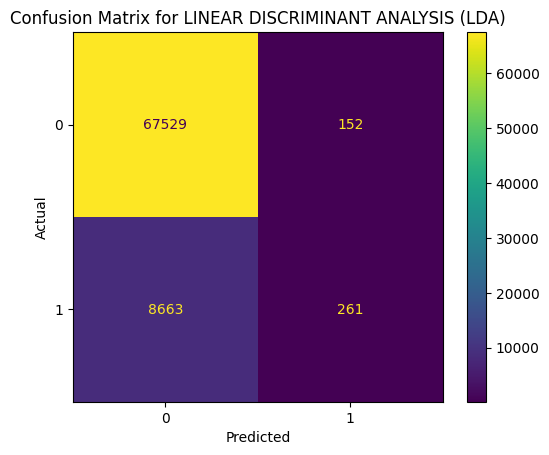

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot()

# Customize the plot
plt.title('Confusion Matrix for LINEAR DISCRIMINANT ANALYSIS (LDA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
# ROC AUC
print("\nROC AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)


ROC AUC Score:
0.7491879950630053


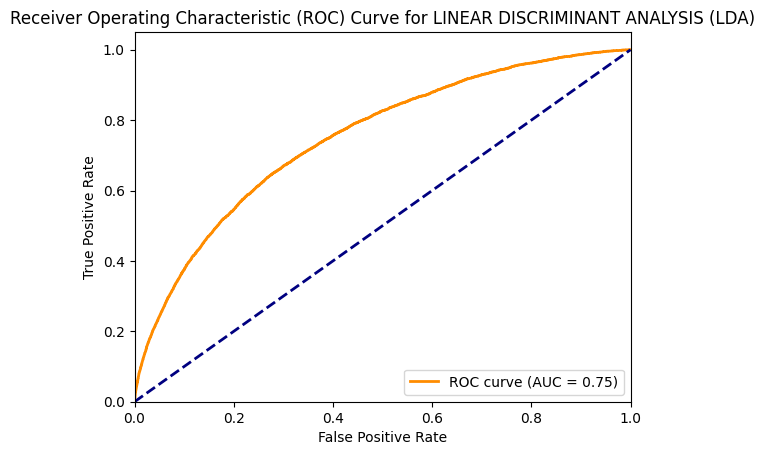

In [22]:

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LINEAR DISCRIMINANT ANALYSIS (LDA)')
plt.legend(loc='lower right')
plt.show()


In [23]:
# Step 6: Save the Model
joblib.dump(lda_model, 'lda_model.pkl')
print("Model saved as 'lda_model.pkl")

Model saved as 'lda_model.pkl
